# Missing Data Imputation

In [1]:
%%time
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import pickle
%matplotlib inline

Wall time: 1.93 s


### Complete Case Analysis (CCA)

In [2]:
df = pd.read_csv(filepath_or_buffer="houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# capture columns with missing %
[(col, df[col].isnull().mean()) for col in df.columns if df[col].isnull().mean()]

[('LotFrontage', 0.1773972602739726),
 ('Alley', 0.9376712328767123),
 ('MasVnrType', 0.005479452054794521),
 ('MasVnrArea', 0.005479452054794521),
 ('BsmtQual', 0.025342465753424658),
 ('BsmtCond', 0.025342465753424658),
 ('BsmtExposure', 0.026027397260273973),
 ('BsmtFinType1', 0.025342465753424658),
 ('BsmtFinType2', 0.026027397260273973),
 ('Electrical', 0.0006849315068493151),
 ('FireplaceQu', 0.4726027397260274),
 ('GarageType', 0.05547945205479452),
 ('GarageYrBlt', 0.05547945205479452),
 ('GarageFinish', 0.05547945205479452),
 ('GarageQual', 0.05547945205479452),
 ('GarageCond', 0.05547945205479452),
 ('PoolQC', 0.9952054794520548),
 ('Fence', 0.8075342465753425),
 ('MiscFeature', 0.963013698630137)]

In [4]:
# capture columns with no or less than 5% NA
col_cca = [col for col in df.columns if df[col].isnull().mean() < 0.05]
col_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [5]:
df.shape

(1460, 81)

In [6]:
df = df[col_cca].dropna(axis=0)
df.shape

(1412, 70)

### Mean & Median Imputation
* Remember that the mean and the median that we will use to replace the NA needs to be calculated in the train set and propagated to the test set. 

In [7]:
df = pd.read_csv(filepath_or_buffer="titanic.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
X = df.drop(labels=["Survived"], axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

In [11]:
# calculate the median Age
median = X_train["Age"].median()
X_train["Age_median"] = X_train["Age"].fillna(median)
X_test["Age_median"] = X_test["Age"].fillna(median)

# calculate the mean Age
mean = X_train["Age"].mean()
X_train["Age_mean"] = X_train["Age"].fillna(mean)
X_test["Age_median"] = X_test["Age"].fillna(mean)

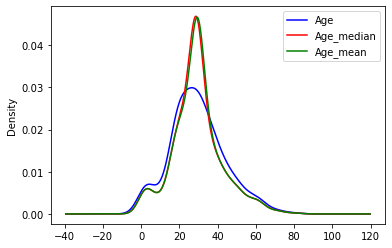

In [12]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax, color="blue")

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

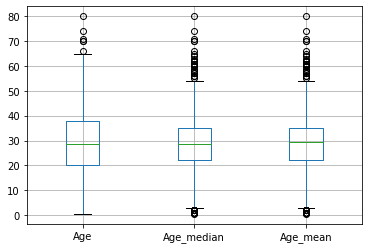

In [13]:
# Let's find out using a boxplot
X_train[['Age', 'Age_median', 'Age_mean']].boxplot();

### Arbitrary Value Imputation
* For arbitrary value imputation this is not so important, because we chose the value arbitrarily, however it is good to adhere to this practice and select the arbitrary value by looking only at the distribution of the variables in the train set.

In [14]:
df = pd.read_csv(filepath_or_buffer="titanic.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
X = df.drop(labels=["Survived"], axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

In [16]:
# For this demo I will replace NA by 2 different arbitrary values
# one at the far right end of the distribution ==> 99
# and alternatively by -1, taking advantage that Age takes only positive values

X_train["Age_99"] = X_train["Age"].fillna(99)
X_train["Age_minus1"] = X_train["Age"].fillna(-1)

X_test["Age_99"] = X_test["Age"].fillna(99)
X_test["Age_minus1"] = X_test["Age"].fillna(-1)

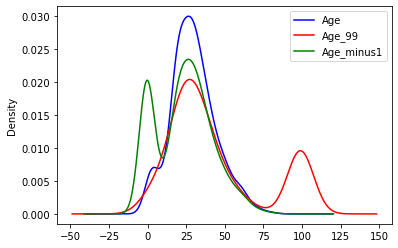

In [17]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax, color="blue")

# variable imputed with 99
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

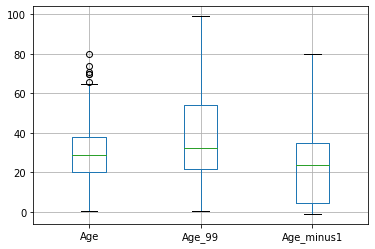

In [18]:
# Finally, I mentioned that arbitrary value imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[['Age', 'Age_99', 'Age_minus1']].boxplot();

### End of distribution imputation
* Imputation has to be done over the training set, and then propagated to the test set. For this imputation technique, this means that when selecting the value with which we will replace the NA, we need to do so only by looking at the distribution of the variables in the training set. Then we use the selected value to replace NA both in the train and test set.

In [19]:
df = pd.read_csv(filepath_or_buffer="titanic.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
X = df.drop(labels=["Survived"], axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

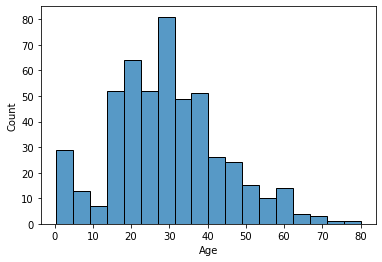

In [21]:
# Normal distribution

sns.histplot(data=X_train, x="Age");

In [22]:
# far end of the distribution:

# Because Age looks approximately Gaussian, I use the
# mean and std to calculate the replacement value

fillna_value = X_train["Age"].mean() + 3 * X_train["Age"].std()

X_train['Age_imputed'] = X_train["Age"].fillna(fillna_value)
X_test['Age_imputed'] = X_test["Age"].fillna(fillna_value)

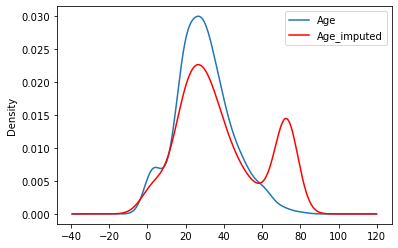

In [23]:
# we can see that the distribution has changed 
# with now more values accumulating towards the tail

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# imputed variable
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

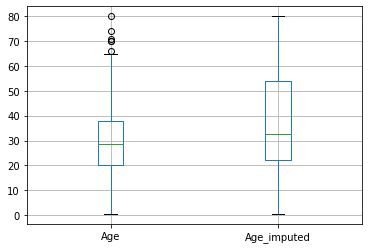

In [24]:
# Finally, I mentioned that end tail imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[['Age', 'Age_imputed']].boxplot();

In [25]:
# Skewed distributions

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
] 
df = pd.read_csv("houseprice.csv", usecols=cols_to_use)
df.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [26]:
# in the next list comprehension, I loop over all the columns 
# of the dataset and select those that contain missing data

[col for col in df.columns if df[col].isna().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [27]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

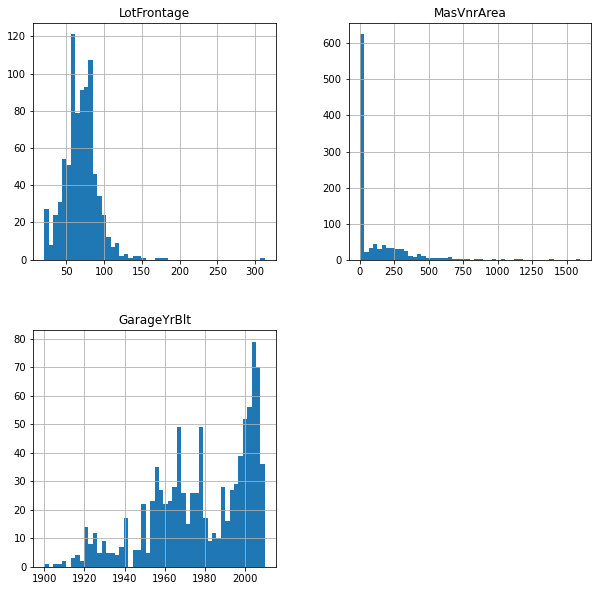

In [28]:
# let's plot the distributions of the variables

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist(bins=50, figsize=(10,10))
plt.show();

In [29]:
# the variables are not normally distributed, let's impute the NA using the IQR proximity rule,

IQR_LotFrontage = X_train['LotFrontage'].quantile(0.75) - X_train['LotFrontage'].quantile(0.25)
fillna_value_LotFrontage = X_train['LotFrontage'].quantile(0.75) + 3 * IQR_LotFrontage
X_train["LotFrontage_imputed"] = X_train["LotFrontage"].fillna(fillna_value_LotFrontage)
X_test["LotFrontage_imputed"] = X_test["LotFrontage"].fillna(fillna_value_LotFrontage)

IQR_MasVnrArea = X_train['MasVnrArea'].quantile(0.75) - X_train['MasVnrArea'].quantile(0.25)
fillna_value_MasVnrArea = X_train['MasVnrArea'].quantile(0.75) + 3 * IQR_MasVnrArea
X_train["MasVnrArea_imputed"] = X_train["MasVnrArea"].fillna(fillna_value_MasVnrArea)
X_test["MasVnrArea_imputed"] = X_test["MasVnrArea"].fillna(fillna_value_MasVnrArea)

IQR_GarageYrBlt = X_train['GarageYrBlt'].quantile(0.75) - X_train['GarageYrBlt'].quantile(0.25)
fillna_value_GarageYrBlt = X_train['GarageYrBlt'].quantile(0.75) + 3 * IQR_GarageYrBlt
X_train["GarageYrBlt_imputed"] = X_train["GarageYrBlt"].fillna(fillna_value_GarageYrBlt)
X_test["GarageYrBlt_imputed"] = X_test["GarageYrBlt"].fillna(fillna_value_GarageYrBlt)

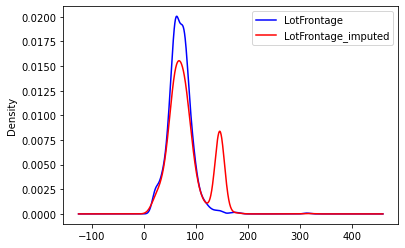

In [30]:
# let's evaluate the effect of end tail imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the extreme value

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax, color="blue")

# imputed variable
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

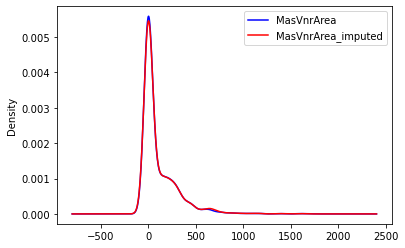

In [31]:
# MasVnrArea had only few outliers, so the change in the distribution is
# not so dramatic. Less than when using an arbitrary value of 2999 as
# we did in the previous notebook

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax, color="blue")

# imputed variable
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

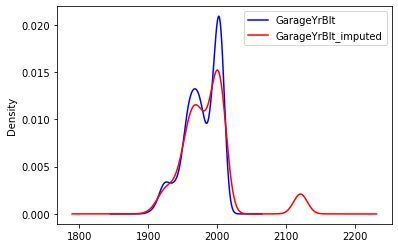

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['GarageYrBlt'].plot(kind='kde', ax=ax, color="blue")

# imputed variable
X_train['GarageYrBlt_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

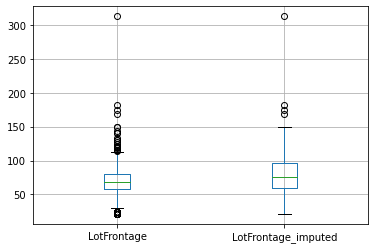

In [33]:
# we see that there are a fewer outliers as well after the imputation

X_train[['LotFrontage', 'LotFrontage_imputed']].boxplot();

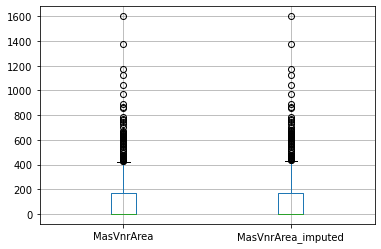

In [34]:
# however, the outliers are not so affected for MasVnrArea

X_train[['MasVnrArea', 'MasVnrArea_imputed']].boxplot();

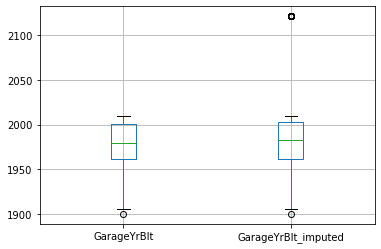

In [35]:
X_train[['GarageYrBlt', 'GarageYrBlt_imputed']].boxplot();

### Frequent Category Imputation
* Although the mode, or most frequent value can be calculated for both numerical and categorical variables, in practice, we only use this technique on categorical variables. The reason is that for numerical variables, the mean or the median tend to better represent the average value of the population.

In [36]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']
df = pd.read_csv('houseprice.csv', usecols=cols_to_use)
df.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [37]:
df.isna().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [38]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [39]:
# BsmtQual
fillna_value = X_train["BsmtQual"].mode()[0]
X_train['BsmtQual_imputed'] = X_train["BsmtQual"].fillna(fillna_value)
X_test['BsmtQual_imputed'] = X_test["BsmtQual"].fillna(fillna_value)

# FireplaceQu
fillna_value = X_train["FireplaceQu"].mode()[0]
X_train['FireplaceQu_imputed'] = X_train["FireplaceQu"].fillna(fillna_value)
X_test['FireplaceQu_imputed'] = X_test["FireplaceQu"].fillna(fillna_value)

In [40]:
X_train.isna().mean()

BsmtQual               0.023483
FireplaceQu            0.467710
BsmtQual_imputed       0.000000
FireplaceQu_imputed    0.000000
dtype: float64

In [41]:
X_train["BsmtQual"].mode()[0]

'TA'

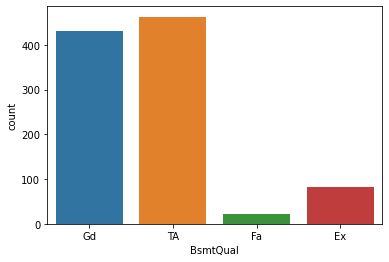

In [42]:
sns.countplot(data=X_train, x="BsmtQual");

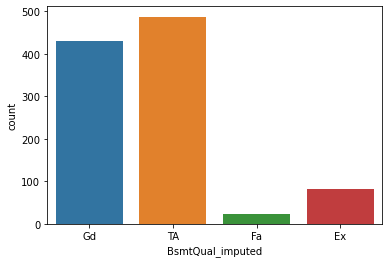

In [43]:
sns.countplot(data=X_train, x="BsmtQual_imputed");

In [44]:
X_train["FireplaceQu"].mode()[0]

'Gd'

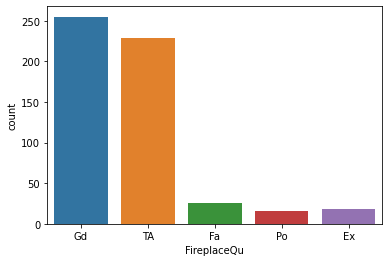

In [45]:
sns.countplot(data=X_train, x="FireplaceQu");

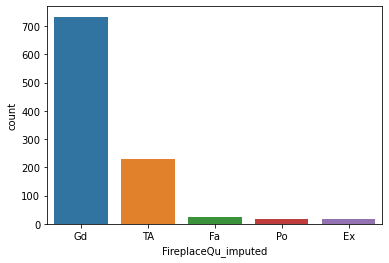

In [46]:
sns.countplot(data=X_train, x="FireplaceQu_imputed");

### Missing Category Imputation
* This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

In [47]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

df = pd.read_csv('houseprice.csv', usecols=cols_to_use)
df.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [48]:
# When replacing NA in categorical variables by a label called 'Missing', we are not learning anything from the 
# training set, so in principle we could do this in the original dataset and then separate into train and test. 
# However, I do not recommend this practice. You will see in later notebooks that splitting into train and test right 
# at the beginning helps with building a machine learning pipeline. So I will continue with this practice here as well.

X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [49]:
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
dtype: float64

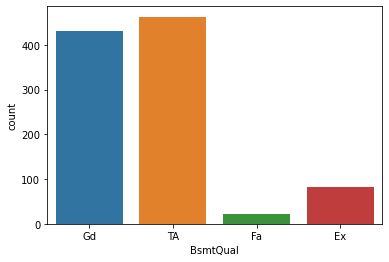

In [50]:
sns.countplot(data=X_train, x="BsmtQual");

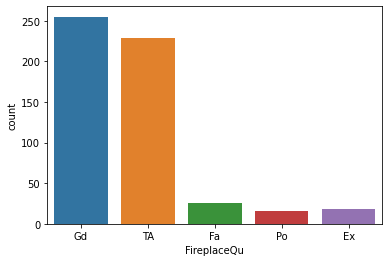

In [51]:
sns.countplot(data=X_train, x="FireplaceQu");

In [52]:
X_train['BsmtQual'] = X_train['BsmtQual'].fillna('Missing')
X_test['BsmtQual'] = X_test['BsmtQual'].fillna('Missing')

X_train['FireplaceQu'] = X_train['FireplaceQu'].fillna('Missing')
X_test['FireplaceQu'] = X_test['FireplaceQu'].fillna('Missing')

In [53]:
X_train.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

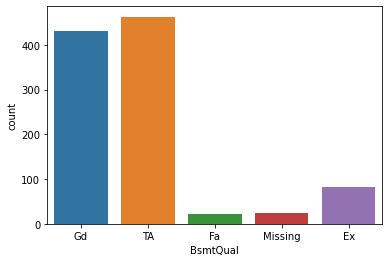

In [54]:
sns.countplot(data=X_train, x="BsmtQual");

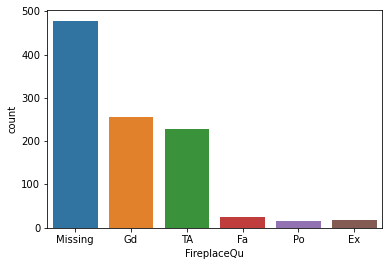

In [55]:
sns.countplot(data=X_train, x="FireplaceQu");

### Random Sample Imputation
* By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.
* By random sampling observations of the present categories, for categorical variables, we guarantee that the frequency of the different categories / labels within the variable is preserved.

In [56]:
# load the Titanic Dataset with a few variables for demonstration

df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [57]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [58]:
X = df.drop(labels=["Survived"], axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

In [59]:
# let's impute Age by random sampling both in
# train and test sets

# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train['Age_imputed'] = X_train['Age'].copy()
X_test['Age_imputed'] = X_test['Age'].copy()

random_sample_train = X_train['Age'].dropna().sample(n=X_train['Age'].isnull().sum(), random_state=0)
random_sample_test = X_train['Age'].dropna().sample(n=X_test['Age'].isnull().sum(), random_state=0)

# what is all of the above code doing?

# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs
# 2) sample() is the method that will do the random sampling
# 3) X_train['Age'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable
# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['Age'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['Age'].isnull(), 'Age_imputed'] = random_sample_train
X_test.loc[X_test['Age'].isnull(), 'Age_imputed'] = random_sample_test

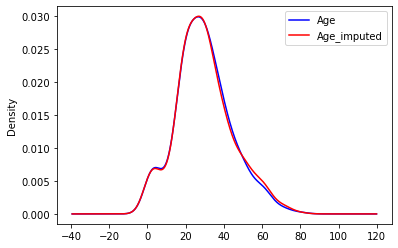

In [60]:
# we can see that the distribution of the variable after
# random sample imputation is almost exactly the same as the original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax, color="blue")
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

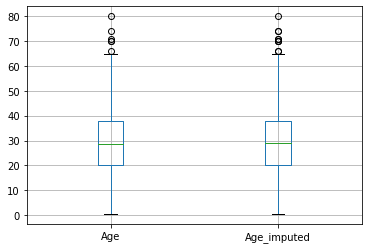

In [61]:
# Finally, the outliers are also less affected by this imputation
# technique

# Let's find out using a boxplot
X_train[['Age', 'Age_imputed']].boxplot();

### Missing Indicator
* A Missing Indicator is an additional binary variable, which indicates whether the data was missing for an observation (1) or not (0).

In [62]:
# load the Titanic Dataset with a few variables for demonstration

df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [63]:
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [64]:
X = df.drop(labels=["Survived"], axis=1)
y = df["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

In [65]:
# add the missing indicator

# this is done very simply by using np.where from numpy
# and isnull from pandas:

X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)

X_train.head()

,Age,Fare,Age_NA
231,29.0,7.7750,0
836,21.0,8.6625,0
639,NaN,16.1000,1
389,17.0,12.0000,0
597,49.0,0.0000,0


* Adding a missing indicator is never used alone. On the contrary, it is always used together with another imputation technique

### Mean Median Imputation Sklearn

* [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
* [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
* [make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html#sklearn.compose.make_column_transformer)

In [66]:
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]
df = pd.read_csv('houseprice.csv', usecols=cols_to_use)

In [67]:
df.isna().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [68]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [69]:
X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', SimpleImputer(strategy='mean'), numeric_features_mean),
    ('median_imputer', SimpleImputer(strategy='median'), numeric_features_median)
], remainder='passthrough')

# preprocessor = make_column_transformer(
#     (SimpleImputer(strategy='mean'), numeric_features_mean),
#     (SimpleImputer(strategy='median'), numeric_features_median),
#     remainder='passthrough'
# )

In [71]:
preprocessor.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [72]:
# same as below
X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

In [73]:
# same as below
X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [74]:
# remember that the returned object is a NumPy array

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [75]:
preprocessor.named_transformers_

{'mean_imputer': SimpleImputer(),
 'median_imputer': SimpleImputer(strategy='median'),
 'remainder': 'passthrough'}

In [76]:
# same as above
preprocessor.named_transformers_['mean_imputer'].statistics_

array([69.66866747])

In [77]:
# same as above
preprocessor.named_transformers_['median_imputer'].statistics_

array([   0., 1979.])

In [78]:
# remainder='passthrough'
X_train.shape

(1022, 9)

### Arbitrary Value Imputation Sklearn

In [79]:
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]
df = pd.read_csv('houseprice.csv', usecols=cols_to_use)

In [80]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [81]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', SimpleImputer(strategy='constant', fill_value=999), features_LotFrontAge),
    ('imputer_MasVnrArea', SimpleImputer(strategy='constant', fill_value=-10), features_MasVnrArea),
    ('imputer_GarageYrBlt', SimpleImputer(strategy='constant', fill_value=1700), features_GarageYrBlt)
], remainder='drop')

# preprocessor = make_column_transformer(
#     (SimpleImputer(strategy='strategy', fill_value=999), features_LotFrontAge),
#     (SimpleImputer(strategy='strategy', fill_value=-10), features_MasVnrArea),
#     (SimpleImputer(strategy='strategy', fill_value=1700), features_GarageYrBlt),
#     remainder='drop')

In [82]:
preprocessor.transformers

[('imputer_LotFrontAge',
  SimpleImputer(fill_value=999, strategy='constant'),
  ['LotFrontage']),
 ('imputer_MasVnrArea',
  SimpleImputer(fill_value=-10, strategy='constant'),
  ['MasVnrArea']),
 ('imputer_GarageYrBlt',
  SimpleImputer(fill_value=1700, strategy='constant'),
  ['GarageYrBlt'])]

In [83]:
# remember that the returned object is a NumPy array

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [84]:
preprocessor.named_transformers_

{'imputer_LotFrontAge': SimpleImputer(fill_value=999, strategy='constant'),
 'imputer_MasVnrArea': SimpleImputer(fill_value=-10, strategy='constant'),
 'imputer_GarageYrBlt': SimpleImputer(fill_value=1700, strategy='constant'),
 'remainder': 'drop'}

In [85]:
preprocessor.named_transformers_['imputer_LotFrontAge'].statistics_

array([999.])

In [86]:
preprocessor.named_transformers_['imputer_MasVnrArea'].statistics_

array([-10.])

In [87]:
preprocessor.named_transformers_['imputer_GarageYrBlt'].statistics_

array([1700.])

In [88]:
# remainder='drop'
X_train.shape

(1022, 3)

### Frequent Category Imputation Sklearn
* Replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

In [89]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']
df = pd.read_csv('houseprice.csv', usecols=cols_to_use)

In [90]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer


features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea', ]
features_categoric = ['BsmtQual', 'FireplaceQu', 'MSZoning',
                      'Street', 'Alley']

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', SimpleImputer(strategy='mean'), features_numeric), # you can use most_frequent on numeric data
    ('categoric_imputer', SimpleImputer(strategy='most_frequent'), features_categoric)
], remainder="drop")

# preprocessor = make_column_transformer(
#     (SimpleImputer(strategy='mean'), features_numeric),
#     (SimpleImputer(strategy='most_frequent'), features_categoric),
#     remainder="drop"
# )

In [92]:
preprocessor.transformers

[('numeric_imputer',
  SimpleImputer(),
  ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputer',
  SimpleImputer(strategy='most_frequent'),
  ['BsmtQual', 'FireplaceQu', 'MSZoning', 'Street', 'Alley'])]

In [93]:
# same as below
X_train[features_numeric].mean()

BsmtUnfSF      565.992172
LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [94]:
# same as below
X_train[features_categoric].mode()

,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,TA,Gd,RL,Pave,Pave


In [95]:
# remember that the returned object is a NumPy array

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [96]:
preprocessor.named_transformers_

{'numeric_imputer': SimpleImputer(),
 'categoric_imputer': SimpleImputer(strategy='most_frequent')}

In [97]:
# same as above
preprocessor.named_transformers_['numeric_imputer'].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [98]:
# same as above
preprocessor.named_transformers_['categoric_imputer'].statistics_

array(['TA', 'Gd', 'RL', 'Pave', 'Pave'], dtype=object)

In [99]:
# remainder='drop'
X_train.shape

(1022, 8)

### Missing Category Imputation Sklearn
* If your dataframe contains variables that are numerical and categorical, NA in both will be replaced by 'Missing" therefore converting your numerical variables into categorical, which is probably not what you are after.

In [100]:
cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]
df = pd.read_csv('houseprice.csv', usecols=cols_to_use)

In [101]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [102]:
# I will impute the numerical variables by the mean, 
# and the categorical variables by replacing NA with 'Missing'

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

features_numeric = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
features_categoric = ['BsmtQual', 'FireplaceQu']

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', SimpleImputer(strategy='mean'), features_numeric),
    ('categoric_imputer', SimpleImputer(strategy='constant', fill_value = 'Missing'), features_categoric)
], remainder="drop")

# preprocessor = make_column_transformer(
#     (SimpleImputer(strategy='mean'), features_numeric),
#     (SimpleImputer(strategy='constant', fill_value = 'Missing'), features_categoric),
#     remainder="drop"
# )

In [103]:
preprocessor.transformers

[('numeric_imputer',
  SimpleImputer(),
  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']),
 ('categoric_imputer',
  SimpleImputer(fill_value='Missing', strategy='constant'),
  ['BsmtQual', 'FireplaceQu'])]

In [104]:
# same as below
X_train[features_numeric].mean()

LotFrontage      69.668667
MasVnrArea      103.553589
GarageYrBlt    1978.012397
dtype: float64

In [105]:
# remember that the returned object is a NumPy array

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [106]:
preprocessor.named_transformers_

{'numeric_imputer': SimpleImputer(),
 'categoric_imputer': SimpleImputer(fill_value='Missing', strategy='constant')}

In [107]:
# same as above
preprocessor.named_transformers_['numeric_imputer'].statistics_

array([  69.66866747,  103.55358899, 1978.01239669])

In [108]:
preprocessor.named_transformers_['categoric_imputer'].statistics_

array(['Missing', 'Missing'], dtype=object)

### MissingIndicator Sklearn
* [MissingIndicator](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator)
* Binary indicators for missing values

In [109]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']
df = pd.read_csv('houseprice.csv', usecols=cols_to_use)

In [110]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [111]:
from sklearn.impute import MissingIndicator

# features={‘missing-only’, ‘all’}
# sparse={'auto', True, False}
# error_on_new={True, FAlse}
indicator = MissingIndicator(features='missing-only', sparse="auto", error_on_new=True) 

In [112]:
X_train = indicator.fit_transform(X_train)
X_test = indicator.transform(X_test)

In [113]:
indicator.features_

array([1, 3, 4, 5, 7], dtype=int64)

In [114]:
X_train

array([[ True,  True, False, False,  True],
       [ True,  True, False, False, False],
       [False,  True, False, False,  True],
       ...,
       [False,  True, False,  True,  True],
       [ True,  True, False, False, False],
       [False,  True, False, False,  True]])

In [115]:
X_test

array([[ True,  True,  True, False, False],
       [False,  True, False, False, False],
       [ True,  True, False, False, False],
       ...,
       [False,  True, False, False, False],
       [False,  True, False, False,  True],
       [False,  True, False, False, False]])

### SimpleImputer, add_indicator=True

In [116]:
cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]
df = pd.read_csv('houseprice.csv', usecols=cols_to_use)

In [117]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [118]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

features_numeric = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
features_categoric = ['BsmtQual', 'FireplaceQu']

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', SimpleImputer(strategy='mean', add_indicator=True), features_numeric),
    ('categoric_imputer', SimpleImputer(strategy='constant', fill_value='Missing', add_indicator=True), features_categoric)
], remainder="drop")

In [119]:
# remember that the returned object is a NumPy array

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [120]:
X_train

array([[69.66866746698679, 573.0, 1998.0, ..., 'Missing', False, True],
       [69.66866746698679, 0.0, 1996.0, ..., 'Gd', False, False],
       [50.0, 0.0, 1978.0123966942149, ..., 'Missing', False, True],
       ...,
       [68.0, 0.0, 1978.0, ..., 'Missing', True, True],
       [69.66866746698679, 18.0, 2003.0, ..., 'TA', False, False],
       [58.0, 30.0, 1998.0, ..., 'Missing', False, True]], dtype=object)

In [121]:
X_test

array([[69.66866746698679, 103.55358898721731, 1975.0, ..., 'TA', False,
        False],
       [79.0, 0.0, 1941.0, ..., 'TA', False, False],
       [69.66866746698679, 161.0, 1950.0, ..., 'TA', False, False],
       ...,
       [91.0, 660.0, 1995.0, ..., 'TA', False, False],
       [67.0, 110.0, 2002.0, ..., 'Missing', False, True],
       [100.0, 760.0, 2009.0, ..., 'Gd', False, False]], dtype=object)

### Automatic Imputation Method Detection Sklearn
* We will do a grid search over the imputation methods available in Scikit-learn to determine which imputation technique works best for this dataset and the machine learning model of choice.

In [122]:
df = pd.read_csv('houseprice.csv')

# find categorical variables those of type 'Object' in the dataset
features_categorical = [c for c in df.columns if df[c].dtypes=='O']

# find numerical variables those different from object and also excluding the target SalePrice
features_numerical = [c for c in df.columns if df[c].dtypes!='O' and c !='SalePrice']

In [123]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [124]:
# We create the preprocessing pipelines for both
# numerical and categorical data

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, features_numerical),
        ('categorical', categorical_transformer, features_categorical)])

In [125]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

from sklearn.linear_model import Lasso

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Lasso(max_iter=2000))])

In [126]:
from sklearn.model_selection import GridSearchCV

# now we create the grid with all the parameters that we would like to test

param_grid = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant'],
    'regressor__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# cv=3 is the cross-validation
# no_jobs =-1 indicates to use all available cpus
# scoring='r2' indicates to evaluate using the r squared

In [127]:
%%time
# and now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best linear regression from grid search: 0.933
Wall time: 9.75 s


In [128]:
# we can print the best estimator parameters like this
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
               

In [129]:
# and find the best fit parameters like this
grid_search.best_params_

{'preprocessor__categorical__imputer__strategy': 'constant',
 'preprocessor__numerical__imputer__strategy': 'median',
 'regressor__alpha': 100}

In [130]:
# here we can see all the combinations evaluated during the gridsearch
grid_search.cv_results_['params']

[{'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 10},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 100},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean',
  'regressor__alpha': 200},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 10},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 100},
 {'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median',
  'regressor__alpha': 200},
 {'preprocessor__categorical__imputer__strategy': 'constant',
  'preprocessor__numerical__

In [131]:
# and here the scores for each of one of the above combinations
grid_search.cv_results_['mean_test_score']

array([0.84746254, 0.86624908, 0.86552764, 0.84739594, 0.86621021,
       0.8654755 , 0.84814964, 0.86646886, 0.86525292, 0.8481309 ,
       0.86651035, 0.86523714])

In [132]:
grid_search.best_score_

0.8665103484337184

In [133]:
grid_search.n_splits_

5

In [134]:
# and finally let's check the performance over the test set
# This model overfits to the train set, look at the r2 of 
# 0.93 obtained for the train set vs 0.738 for the test set.

print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best linear regression from grid search: 0.738
